In [1]:
#importing all the necessary libraries and porjects 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_map,race_ethnicity_map,parental level of education_map,lunch_map,test preparation course_map,total score,percentage,grades,grades_map
0,0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,5,0,0,218,72.666667,First,1
1,1,female,group C,some college,standard,completed,69,90,88,1,2,4,0,1,247,82.333333,distinction,4
2,2,female,group B,master's degree,standard,none,90,95,93,1,1,3,0,0,278,92.666667,distinction,4
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,2,1,0,148,49.333333,third,3
4,4,male,group C,some college,standard,none,76,78,75,0,2,4,0,0,229,76.333333,First,1


# Visualization

# Frequency distribution of race/ethnicity

In [4]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

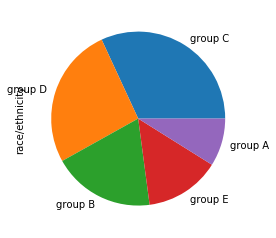

In [5]:
df['race/ethnicity'].value_counts().plot.pie()

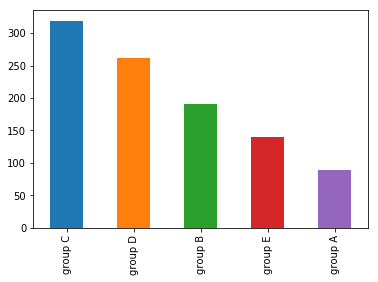

In [6]:
df['race/ethnicity'].value_counts().plot.bar()

# race and parental level of education

In [7]:
df['race/ethnicity'].groupby(df['parental level of education']).value_counts()

parental level of education  race/ethnicity
associate's degree           group C           78
                             group D           50
                             group B           41
                             group E           39
                             group A           14
bachelor's degree            group C           40
                             group D           28
                             group B           20
                             group E           18
                             group A           12
high school                  group C           64
                             group B           48
                             group D           44
                             group E           22
                             group A           18
master's degree              group D           23
                             group C           19
                             group E            8
                             group B            6
      

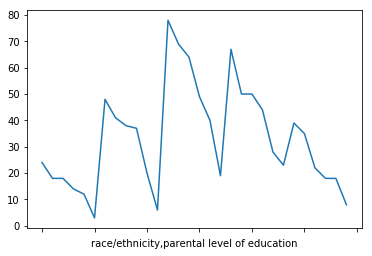

In [8]:
df['parental level of education'].groupby(df['race/ethnicity']).value_counts().plot.line()

# race and lunch

In [9]:
df['race/ethnicity'].groupby(df['lunch']).value_counts()

lunch         race/ethnicity
free/reduced  group C           114
              group D            95
              group B            69
              group E            41
              group A            36
standard      group C           205
              group D           167
              group B           121
              group E            99
              group A            53
Name: race/ethnicity, dtype: int64

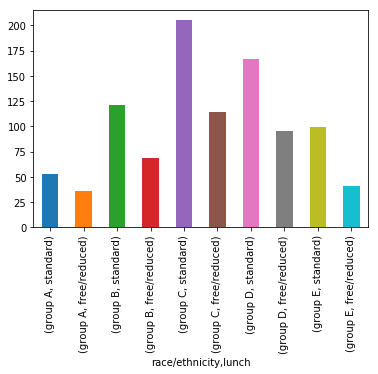

In [10]:
df['lunch'].groupby(df['race/ethnicity']).value_counts().plot.bar()

# race and test preparation course

In [11]:
pd.crosstab(df['race/ethnicity'],df['test preparation course'])

test preparation course,completed,none
race/ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


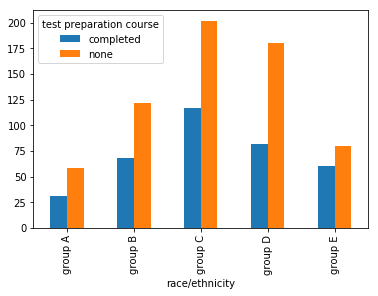

In [12]:
pd.crosstab(df['race/ethnicity'],df['test preparation course']).plot.bar()

# Hypothesis 1: Race - Group A have the best average math score

In [14]:
pd.crosstab(df['race/ethnicity'],df['math score'].mean())

col_0,66.089
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


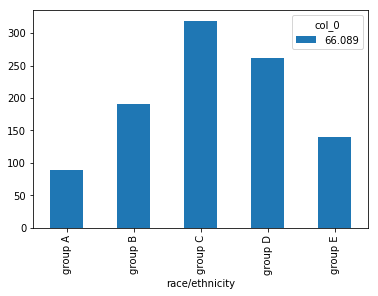

In [16]:
pd.crosstab(df['race/ethnicity'],df['math score'].mean()).plot.bar()

# Hypothesis 2: Race Group D has more  failed students in reading 

In [25]:
pd.crosstab(df['race/ethnicity'],df['reading score']<40)

reading score,False,True
race/ethnicity,,
group A,86,3
group B,183,7
group C,310,9
group D,257,5
group E,138,2


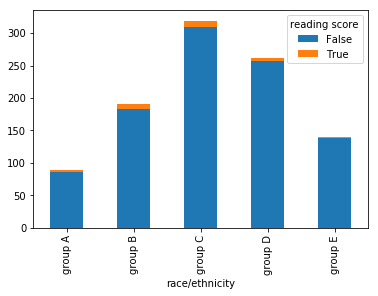

In [31]:
pd.crosstab(df['race/ethnicity'],df['reading score']<40).plot.bar(stacked = True)

# Hypothesis:3 The average score in writing are eqaul in all race groups

In [28]:
df['writing score'].mean()

68.054

In [29]:
df['writing score'].groupby(df['race/ethnicity']).mean()

race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64

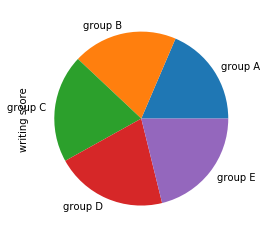

In [30]:
df['writing score'].groupby(df['race/ethnicity']).mean().plot.pie()

# Hypothesis 4: The average percentage is higher than that of all race group percentage average

In [34]:
race_per = df['percentage'].groupby(df['race/ethnicity']).mean()
race_per

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: percentage, dtype: float64

In [33]:
df['percentage'].mean()

67.77066666666666

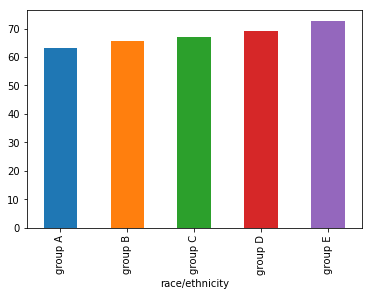

In [37]:
race_per.plot.bar()

In [38]:
# Hypothesis 5 : Race group D have more students acquiring first division

In [39]:
df['grades'].unique()

array(['First', 'distinction', 'third', 'fail', 'second'], dtype=object)

In [40]:
pd.crosstab(df['race/ethnicity'],df['grades']=='First')

grades,False,True
race/ethnicity,,
group A,50,39
group B,97,93
group C,155,164
group D,118,144
group E,67,73


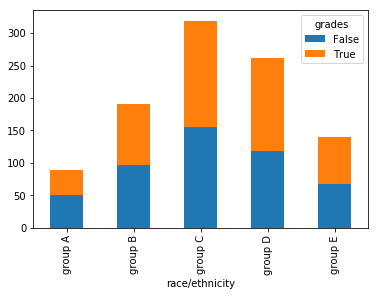

In [41]:
pd.crosstab(df['race/ethnicity'],df['grades']=='First').plot.bar(stacked = True)